## Predict Inflation rate based on other economic indicators (like GDP, Unemployement rate, economic growth etc)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Load the dataset
Inflation = pd.read_csv("Economic Indicators And Inflation.csv")

In [3]:
Inflation.head()

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


In [4]:
Inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 304 non-null    object 
 1    Year                   304 non-null    int64  
 2    GDP (in billion USD)   304 non-null    float64
 3    Inflation Rate (%)     304 non-null    float64
 4    Unemployment Rate (%)  304 non-null    float64
 5    Economic Growth (%)    304 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 14.4+ KB


In [5]:
Inflation.isnull().sum()

Country                   0
 Year                     0
 GDP (in billion USD)     0
 Inflation Rate (%)       0
 Unemployment Rate (%)    0
 Economic Growth (%)      0
dtype: int64

In [6]:
Inflation.describe()

,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
count,304.000000,304.000000,304.000000,304.000000,304.000000
mean,2017.500000,3173.934211,35.531776,6.805493,3.391349
std,4.617373,4365.913537,131.757515,6.687968,3.626414
min,2010.000000,1.000000,-1.200000,1.600000,-14.000000
25%,2013.750000,475.000000,1.635000,4.275000,1.700000
50%,2017.500000,1900.000000,3.300000,5.400000,2.900000
75%,2021.250000,3425.000000,5.857500,7.800000,5.905000
max,2025.000000,22500.000000,857.000000,85.500000,13.700000


In [7]:
Inflation.columns = Inflation.columns.str.strip().str.replace("  ", " ").str.replace(" ", "_")

In [8]:
#  Convert Columns to Numeric
cols_to_convert = Inflation.columns.drop(['Country', 'Year'])  # except Country & Year
for col in cols_to_convert:
    Inflation[col] = pd.to_numeric(Inflation[col], errors='coerce')

# Visualizations

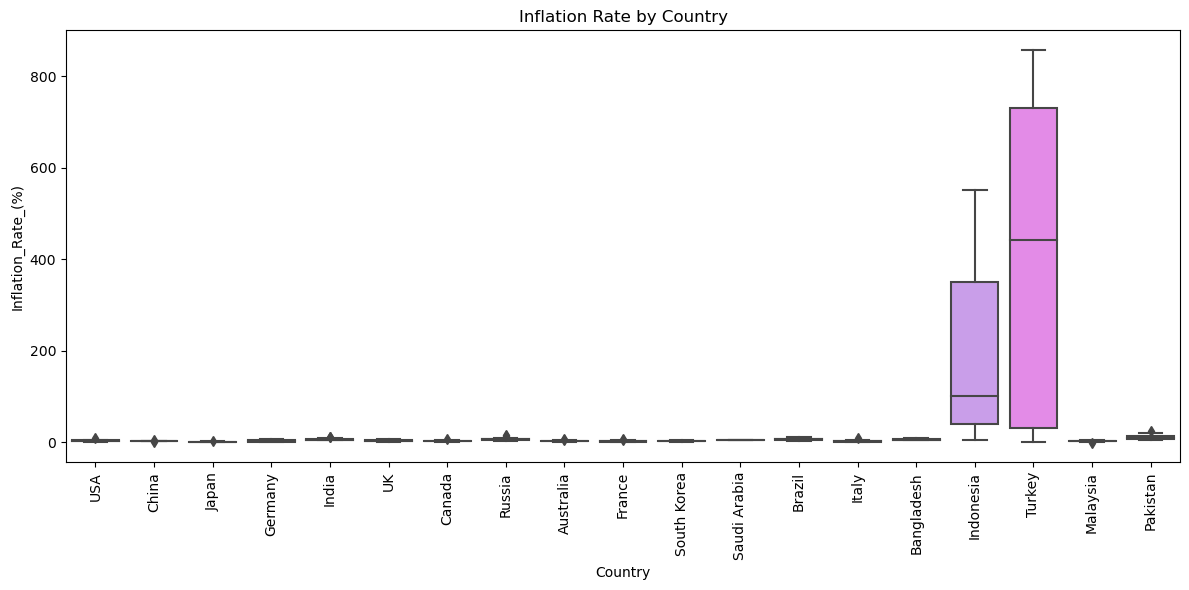

In [9]:
# Boxplot -  Inflation by country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Inflation_Rate_(%)', data=Inflation)
plt.xticks(rotation=90)
plt.title("Inflation Rate by Country")
plt.tight_layout()
plt.show()

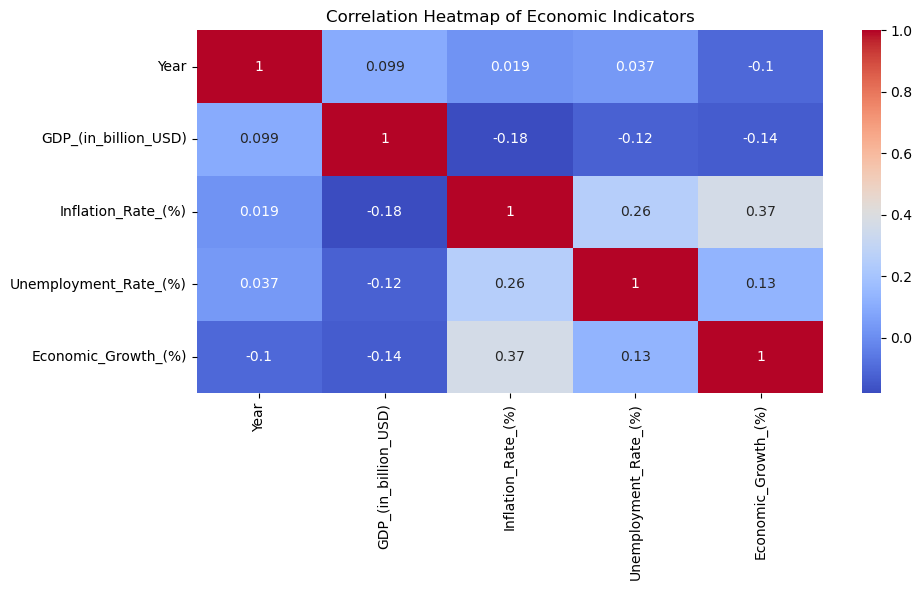

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Inflation.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Economic Indicators")
plt.tight_layout()
plt.show()

In [11]:
# Define Features & Target
X = Inflation.drop(columns=['Inflation_Rate_(%)', 'Country'])  # Features
y = Inflation['Inflation_Rate_(%)']  # Target

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model

In [13]:
#  Train Model - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

In [15]:
# For Linear MOdel
print(" R2 Score:", r2_score(y_test, y_pred))
print(" MAE     :", mean_absolute_error(y_test, y_pred))
print(" RMSE    :", mean_squared_error(y_test, y_pred, squared=False))


 R2 Score: 0.8789635911133049
 MAE     : 10.356645901639347
 RMSE    : 36.175641966705705


In [16]:
# For Random Forest
print("R² Score:", r2_score(y_test, y_pred))
print(" MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8789635911133049
 MAE: 10.356645901639347
RMSE: 36.175641966705705


# Visualize Actual vs Predicted

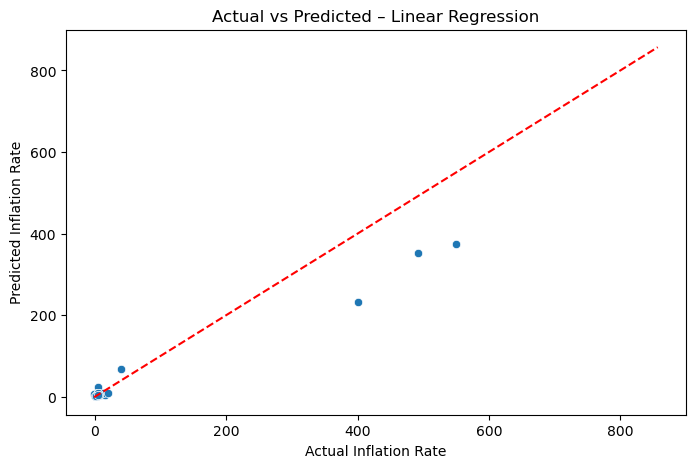

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Inflation Rate")
plt.ylabel("Predicted Inflation Rate")
plt.title("Actual vs Predicted – Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
